# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from math import radians

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [ ]:
fare_data = pd.read_csv('/content/drive/MyDrive/Data_sets/uber.csv')

Problem Statement:

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

In [ ]:
fare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
fare_data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Only two column with missing data, i.e, dropoff_longitude and dropoff_latitude

In [ ]:
data = fare_data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


dropoff_longitude and dropoff_latitude have one missing row. We need to exclude this

In [ ]:
data.nunique()

Unnamed: 0           200000
key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
# Dropping the columns 'Unnamed: 0' and 'key' as well as NA rows

data = data.drop(['Unnamed: 0','key'],axis=1)
data.dropna(axis=0,inplace=True)

# Exploratory Data Analysis (EDA) and Data Pre-processing

Possibility of some outliers in fare amount and passanger

Outliers:
- Fare Amount is between -52 to 499. The negative amount seems unrealistic. Base fare to be set at $2.5
- Passanger count max is 208, which is also not possible. Max to be set at 5

### Identifying Correlations

In [ ]:
# Identify Correlation
data.corr()

<ipython-input-14-fd3e9124074a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


<ipython-input-15-acbf16fcc3e7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')


<Axes: >

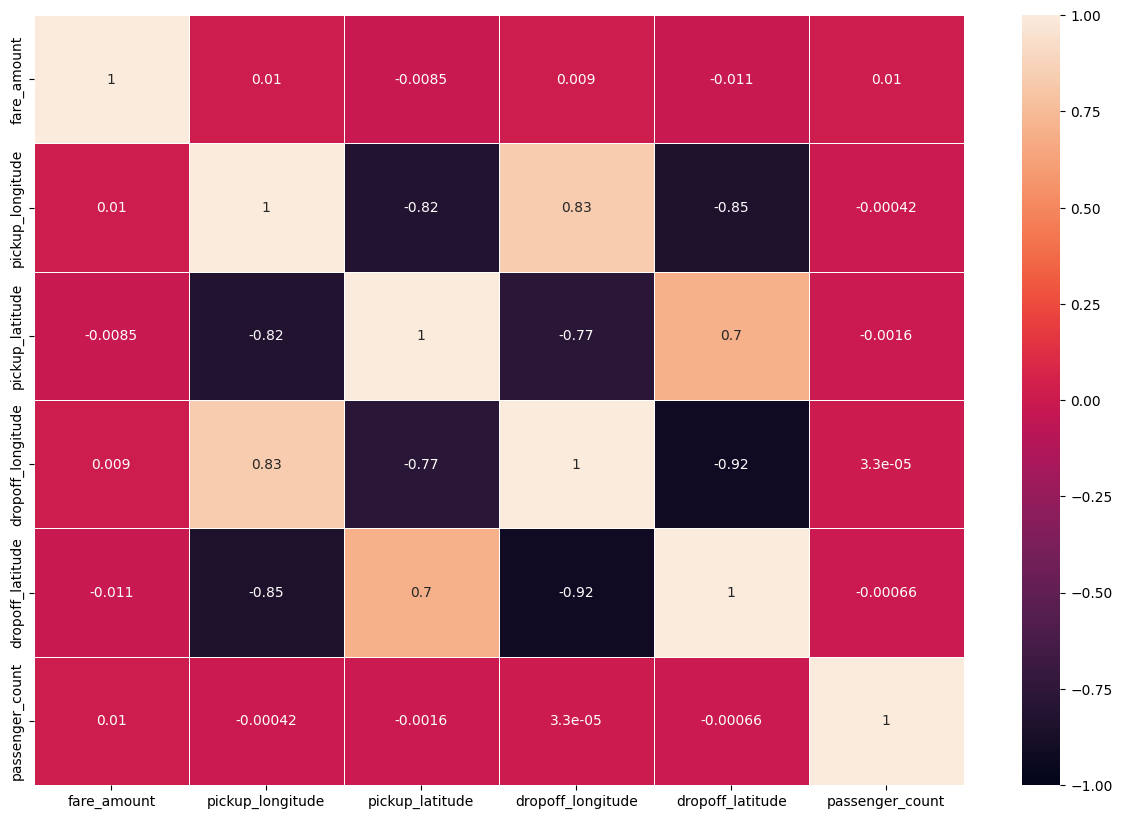

In [ ]:
# Plot the Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

High correlation can be observed between the geo-spatial data points, which was expected. Therefore, there is no need to drop any of the independent variables

In [ ]:
from math import *

In [ ]:
# Define formula to calculate haversine distance
def distance(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [ ]:
# Calculate Haversine distance for each row and add distance in km as a new column
data['distance_travelled'] = distance(data['pickup_longitude'].to_numpy(),
                                                data['pickup_latitude'].to_numpy(),
                                                data['dropoff_longitude'].to_numpy(),
                                                data['dropoff_latitude'].to_numpy()
                                              )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         199999 non-null  float64
 1   pickup_datetime     199999 non-null  object 
 2   pickup_longitude    199999 non-null  float64
 3   pickup_latitude     199999 non-null  float64
 4   dropoff_longitude   199999 non-null  float64
 5   dropoff_latitude    199999 non-null  float64
 6   passenger_count     199999 non-null  int64  
 7   distance_travelled  199999 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.7+ MB


In [ ]:
# As we can see, pickup_datetime is being read as an object data type. However, we need to convert it into datetime data type
data['pickup_datetime']  = pd.to_datetime(data['pickup_datetime'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         199999 non-null  float64            
 1   pickup_datetime     199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude    199999 non-null  float64            
 3   pickup_latitude     199999 non-null  float64            
 4   dropoff_longitude   199999 non-null  float64            
 5   dropoff_latitude    199999 non-null  float64            
 6   passenger_count     199999 non-null  int64              
 7   distance_travelled  199999 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 13.7 MB


In [ ]:
# From pickup_datetime extract date, month, year, weekday and dayname
from datetime import datetime

data['date'] = pd.to_datetime(data['pickup_datetime']).dt.date
data['month'] = pd.to_datetime(data['pickup_datetime']).dt.month
data['year'] = pd.to_datetime(data['pickup_datetime']).dt.year
data['day_of_the_week'] = pd.to_datetime(data['pickup_datetime']).dt.weekday
data['day_name'] = pd.to_datetime(data['pickup_datetime']).dt.day_name()
data['pickup_time'] = pd.to_datetime(data['pickup_datetime']).dt.time
data['pickup_hour'] = pd.to_datetime(data['pickup_datetime']).dt.hour

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         199999 non-null  float64            
 1   pickup_datetime     199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude    199999 non-null  float64            
 3   pickup_latitude     199999 non-null  float64            
 4   dropoff_longitude   199999 non-null  float64            
 5   dropoff_latitude    199999 non-null  float64            
 6   passenger_count     199999 non-null  int64              
 7   distance_travelled  199999 non-null  float64            
 8   date                199999 non-null  object             
 9   month               199999 non-null  int64              
 10  year                199999 non-null  int64              
 11  day_of_the_week     199999 non-null  int64              
 12  day_name        

### Outlier Treatment

The following treatment is being done to outliers:
- passanger_count should be less than 5
- rows with passanger_count = 0 should be dropped
- fare_amount should be kept to the minimum set by Uber, i.e., $2.5
- distance should be maximum 130 km
- distance travelled cannot be zero. Rows with distance = 0 must be dropped

In [ ]:
data.drop(data[data['passenger_count'] > 5].index, axis=0, inplace = True)
data.drop(data[data['passenger_count'] == 0].index, axis=0, inplace = True)
data.drop(data[data['fare_amount'] < 2.5].index, axis=0, inplace = True)
data.drop(data[data['distance_travelled'] > 130].index, axis=0, inplace = True)
data.drop(data[data['distance_travelled'] == 0].index, axis=0, inplace = True)
data.dropna(axis=0,inplace=True)

In [ ]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled,date,month,year,day_of_the_week,day_name,pickup_time,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015-05-07,5,2015,3,Thursday,19:52:06,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009-07-17,7,2009,4,Friday,20:04:56,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009-08-24,8,2009,0,Monday,21:45:00,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009-06-26,6,2009,4,Friday,08:22:21,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014-08-28,8,2014,3,Thursday,17:47:00,17


In [ ]:
data.describe() 


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled,month,year,day_of_the_week,pickup_hour
count,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000
mean,11.336739,-73.916225,40.696089,-73.915258,40.694481,1.595115,3.377859,6.282337,2011.719302,3.049095,13.489234
std,9.730745,2.560946,2.634751,2.561027,2.501323,1.150926,3.984585,3.439349,1.862527,1.946679,6.518660
min,2.500000,-75.419276,-74.015515,-75.423067,-74.015750,1.000000,0.000084,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992274,40.736440,-73.991594,40.735345,1.000000,1.279954,3.000000,2010.000000,1.000000,9.000000
50%,8.500000,-73.982133,40.753273,-73.980564,40.753738,1.000000,2.181325,6.000000,2012.000000,3.000000,14.000000
75%,12.500000,-73.968465,40.767532,-73.965513,40.768327,2.000000,3.938054,9.000000,2013.000000,5.000000,19.000000
max,499.000000,40.808425,401.066667,40.831932,45.031598,5.000000,129.610094,12.000000,2015.000000,6.000000,23.000000


In [ ]:
# Dropping the columns 'pickup datetime' and 'pickup hour' as we have extracted relvant pieces of information
# from these columns and do not need these columns for our analysis now. Also, 'date' and 'day_name', month and yuear
# as well as pickup and dropoff coordinates are not required as we have the required data extracted from them

data = data.drop(['pickup_datetime','pickup_time', 'date', 'pickup_longitude', 'pickup_latitude',
                  'dropoff_longitude', 'dropoff_latitude', 'day_name'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189061 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         189061 non-null  float64
 1   passenger_count     189061 non-null  int64  
 2   distance_travelled  189061 non-null  float64
 3   month               189061 non-null  int64  
 4   year                189061 non-null  int64  
 5   day_of_the_week     189061 non-null  int64  
 6   pickup_hour         189061 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 11.5 MB


# Numerical Features - Univariate Analysis

## Boxplot & Histogram

### Distance

<Axes: xlabel='distance_travelled'>

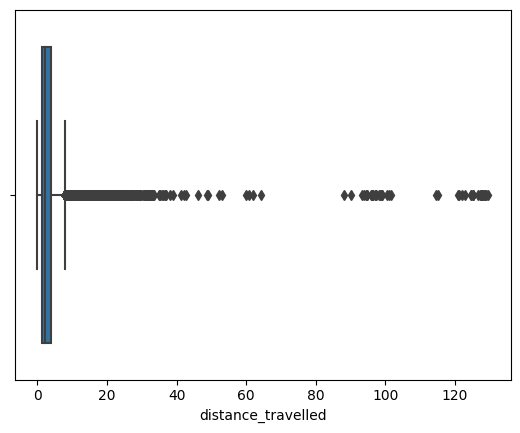

In [ ]:
sns.boxplot(x=data['distance_travelled'])

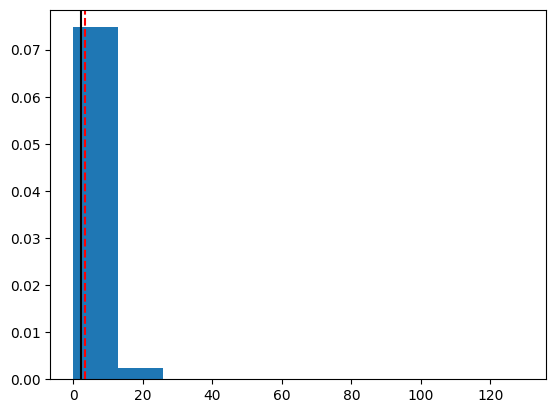

In [ ]:
import matplotlib.pyplot as plt
hist = plt.hist(x=data['distance_travelled'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['distance_travelled'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['distance_travelled'].median(), color = 'black', linestyle='-')

Observations:
- Negatively Skewed
- Outliers on the left end
- Mean and Median are close

# Categorical Features - Univariate Analysis

### Passenger Count

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '5'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

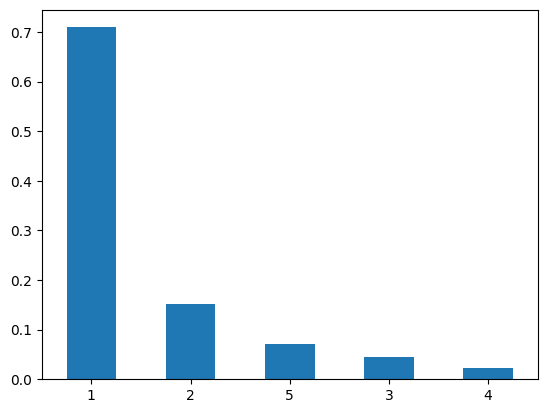

In [ ]:
data['passenger_count'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 70% of trips had only 1 passanger

### Day of the week

<Axes: >

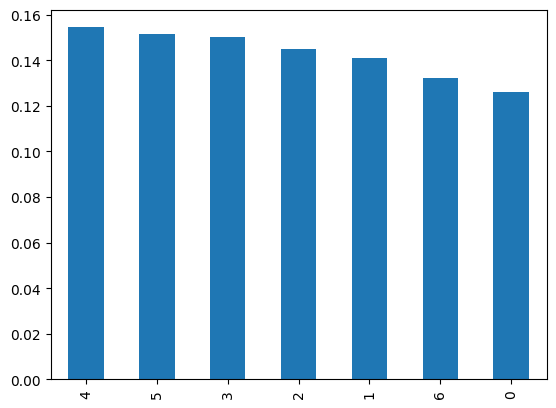

In [ ]:
data['day_of_the_week'].value_counts(normalize = True).plot.bar()
#plt.xticks(rotation = 0)

Observation:
- As expected, Friday (weekend eve) and Saturday had the highest number of trips

### Pickup Time

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '19'),
  Text(1, 0, '18'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '13'),
  Text(6, 0, '12'),
  Text(7, 0, '23'),
  Text(8, 0, '14'),
  Text(9, 0, '17'),
  Text(10, 0, '15'),
  Text(11, 0, '11'),
  Text(12, 0, '9'),
  Text(13, 0, '8'),
  Text(14, 0, '10'),
  Text(15, 0, '16'),
  Text(16, 0, '0'),
  Text(17, 0, '7'),
  Text(18, 0, '1'),
  Text(19, 0, '2'),
  Text(20, 0, '6'),
  Text(21, 0, '3'),
  Text(22, 0, '4'),
  Text(23, 0, '5')])

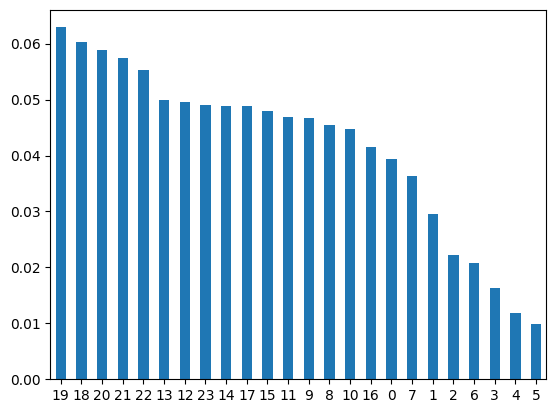

In [ ]:
data['pickup_hour'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- As expected, the number of trips are low during 1am - 5am, and peak between 7pm - 9pm

We can clearly see that during weekdays, peak hours are during the day while on weekends, peak hours are late in the night

# Bivariate / Multivariate Analysis

In [ ]:
pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.8 MB/s eta 0:00:00


In [ ]:

import geopandas as gpd


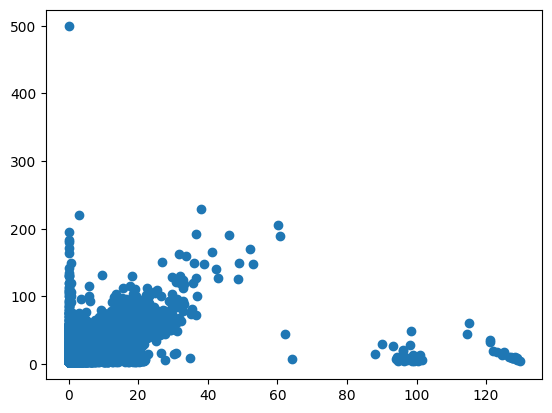

In [ ]:
#Scatte plot of distance vs fare amount
plt.scatter(x = data.distance_travelled, y = data.fare_amount)

# Show the plot
plt.show()

*Generally*, as distance increases, the fare amount also increases with a few sporadic inconsistencies

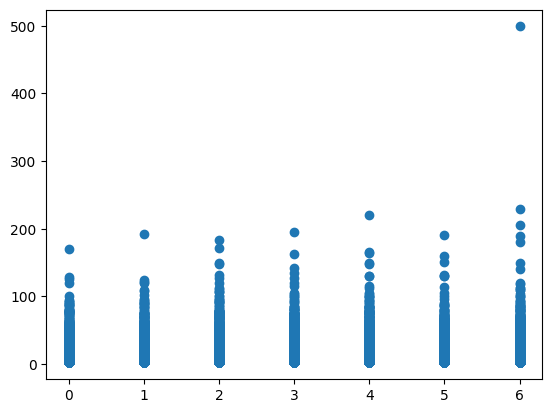

In [ ]:
#Scatte plot of day of the week vs fare amount
plt.scatter(x = data.day_of_the_week, y = data.fare_amount)

# Show the plot
plt.show()

*Generally* speaking, weekend fares are higher than weekday fares. This could be due to distance travelled or due to peak hours

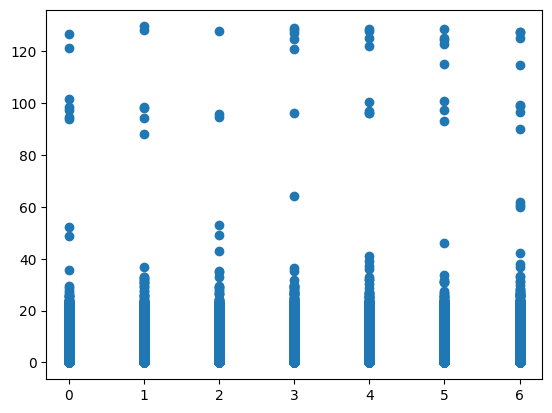

In [ ]:
#Scatte plot of day of the week vs distance to see if there is any relationship between them
plt.scatter(x = data.day_of_the_week, y = data.distance_travelled)

# Show the plot
plt.show()

We see that there isn;t much of a relationship between distance travelled vs fay of the week - thus, it is appears that fare amount being higher on weekends has a high likelihood of being linked to peak hours / wait time due to higher traffic.

Unfortunately, we do not have the dropoff time for each ride to be able to ascertain the time of each trip and demonstrate if we can see a relationship between fare and time travelled

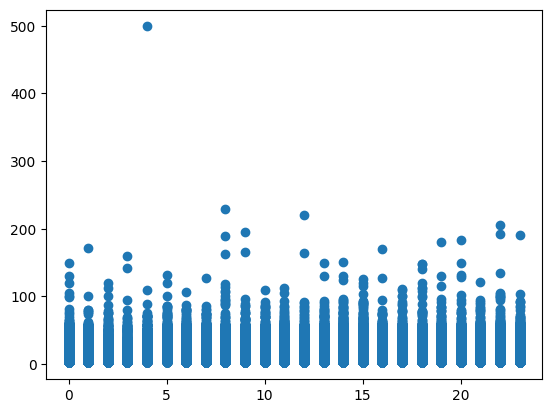

In [ ]:
#Scatte plot of pickup time vs fare amount
plt.scatter(x = data.pickup_hour, y = data.fare_amount)

# Show the plot
plt.show()

We do see some pickup times having a greater % of higher fares as compared to others - however, it is difficult to draw a concluding relationship

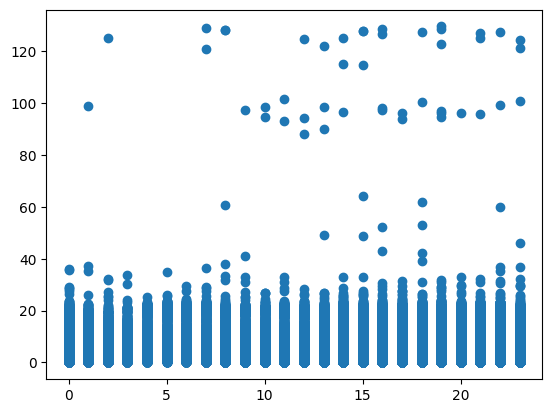

In [ ]:
#Scatte plot of pickup time vs distance
plt.scatter(x = data.pickup_hour, y = data.distance_travelled)

# Show the plot
plt.show()

Some pickup hours have a greater concentration of trips where a high distance was travelled as compared to others

### Data Preparatrion

### Feature Scaling

Feature Scaling is required because of two reasons:
1. The data points are far from each other. This means that in some columns, the distance between data points is a lot
2. Some of the features have a unit while other features are unitless. Thereofre, it is important to make all features unitless

In [ ]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

In [ ]:
x = data.drop(['fare_amount'], axis = 1)
y = data['fare_amount'].values.reshape(-1, 1)

In [ ]:
y_std = std.fit_transform(y)

x_std = std.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.3, random_state = 42)

In [ ]:
x_train.shape

(132342, 6)

In [ ]:
y_train.shape

(132342, 1)

In [ ]:
x_test.shape

(56719, 6)

In [ ]:
y_test.shape

(56719, 1)

# Regression Models

## Linear Regression

In [ ]:
 #  Linear Regression
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)


y_pred_train = lr_reg.predict(x_train)
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))
y_pred_lr_reg = lr_reg.predict(x_test)

print(r2_score(y_test, y_pred_lr_reg)) 


0.653594829855476
0.5782372370795461


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
LR_pred = LR.predict(x_test)
y_pr= LR.predict(x_train)

In [ ]:
print("Training set score: {:.2f}".format(LR.score(x_train, y_train)))
print("Test set score: {:.7f}".format(LR.score(x_test, y_test)))

Training set score: 0.65
Test set score: 0.5782372


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

MAE_LR= metrics.mean_absolute_error(y_test, LR_pred)
MSE_LR= metrics.mean_squared_error(y_test, LR_pred)
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
r2_LR=r2_score(y_test, LR_pred)
Adj_r2_LR=1-(1-r2_score(y_test, LR_pred))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))




MAE_LR= metrics.mean_absolute_error(y_test, LR_pred)
MSE_LR= metrics.mean_squared_error(y_test, LR_pred)
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
r2_LR=r2_score(y_test, LR_pred)
Adj_r2_LR=1-(1-r2_score(y_test, LR_pred))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [ ]:
print('Mean absolute error of linear regression',MAE_LR)
print('Mean square  error of linear regression',MSE_LR)
print('root Mean square error of linear regression',RMSE_LR)
print('r2 score of linear regression',r2_LR)
print('adjusted r2 of linear regression',Adj_r2_LR)

Mean absolute error of linear regression 0.2573904473859176
Mean square  error of linear regression 0.4147342387915015
root Mean square error of linear regression 0.6439986326006457
r2 score of linear regression 0.5782372370795461
adjusted r2 of linear regression 0.5781926155430543


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
DTpreds = DT.predict(x_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

lr_reg = DecisionTreeRegressor()
lr_reg.fit(x_train, y_train)


y_pred_train = lr_reg.predict(x_train)
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))
y_pred_lr_reg = lr_reg.predict(x_test)
print(r2_score(y_test, y_pred_lr_reg)) 


1.0
0.5425076640340932


In [ ]:
print("Training set score: {:.2f}".format(DT.score(x_train, y_train)))
print("Test set score: {:.7f}".format(DT.score(x_test, y_test)))

Training set score: 1.00
Test set score: 0.5489186


In [ ]:
MAE_DT= metrics.mean_absolute_error(y_test, DTpreds)
MSE_DT= metrics.mean_squared_error(y_test, DTpreds)
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test, DTpreds))
r2_DT=r2_score(y_test, DTpreds)
Adj_r2_DT=1-(1-r2_score(y_test, DTpreds))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [ ]:
print('Mean absolute error of decision tree',MAE_DT)
print('Mean square  error of decision tree',MSE_DT)
print('root Mean square error of decision tree',RMSE_DT)
print('r2 score of decision tree',r2_DT)
print('adjusted r2 of decision tree',Adj_r2_DT)

Mean absolute error of decision tree 0.30600127212474926
Mean square  error of decision tree 0.4435643398594674
root Mean square error of decision tree 0.6660062611263257
r2 score of decision tree 0.5489185506910463
adjusted r2 of decision tree 0.5488708273045346


    Hyper Parameter Tuning For Decison Tree Using 
    

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree regressor
dtr = DecisionTreeRegressor()

# Use GridSearchCV to evaluate different combinations of hyperparameters
grid_search = GridSearchCV(dtr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

y_pred_train = grid_search.predict(x_train)
print(" Train R2 Score ")
print(r2_score(y_train, y_pred_train))
y_pred_lr_reg = grid_search.predict(x_test)
print("Test R2 Score ")
print(r2_score(y_test, y_pred_lr_reg))

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
 Train R2 Score 
0.7787793518211696
Test R2 Score 
0.7947624721337179


Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
lr_reg = GradientBoostingRegressor()
lr_reg.fit(x_train, y_train)


y_pred_train = lr_reg.predict(x_train)
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))
y_pred_lr_reg = lr_reg.predict(x_test)
print(r2_score(y_test, y_pred_lr_reg)) 

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

DT = GradientBoostingRegressor()
DT.fit(x_train, y_train)

MAE_DT= metrics.mean_absolute_error(y_test, DTpreds)
MSE_DT= metrics.mean_squared_error(y_test, DTpreds)
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test, DTpreds))
r2_DT=r2_score(y_test, DTpreds)
Adj_r2_DT=1-(1-r2_score(y_test, DTpreds))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Training set score: {:.2f}".format(DT.score(x_train, y_train)))
print("Test set score: {:.7f}".format(DT.score(x_test, y_test)))
print('Mean absolute error',MAE_DT)
print('Mean square  error ',MSE_DT)
print('root Mean square error ',RMSE_DT)
print('r2 score of ',r2_DT)
print('adjusted r2 ',Adj_r2_DT)

Training set score: 0.82
Test set score: 0.7829134
Mean absolute error 0.30600127212474926
Mean square  error  0.4435643398594674
root Mean square error  0.6660062611263257
r2 score of  0.5489185506910463
adjusted r2  0.5488708273045346


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV




# Define the hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [245,246,247],
    'max_depth' : [5,6,7]
}

# Create a gradient boosting regressor
gbr = GradientBoostingRegressor()

# Use GridSearchCV to evaluate different combinations of hyperparameters
grid_search = GridSearchCV(gbr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


y_pred_train = grid_search.predict(x_train)
print(" Train R2 Score ")
print(r2_score(y_train, y_pred_train))
y_pred_lr_reg = grid_search.predict(x_test)
print("Test R2 Score ")
print(r2_score(y_test, y_pred_lr_reg))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

    Lasso Regression 

In [ ]:
from sklearn.linear_model import Lasso


# Create a Lasso regressor
lasso_reg = Lasso(alpha=0.1)

# Train the model on the training set
lasso_reg.fit(x_train, y_train)

y_pred_train = lr_reg.predict(x_train)
print(" Train R2 Score ")
print(r2_score(y_train, y_pred_train))
y_pred_lr_reg = lr_reg.predict(x_test)
print("Test R2 Score ")
print(r2_score(y_test, y_pred_lr_reg))

In [ ]:
from sklearn.linear_model import Lasso

# Define the hyperparameters and their possible values
param_grid = {'alpha': [0.1, 1, 10]}

# Create a Lasso regressor
lasso_reg = Lasso()

# Use GridSearchCV to evaluate different combinations of hyperparameters
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

y_pred_train = grid_search.predict(x_train)
print(" Train R2 Score ")
print(r2_score(y_train, y_pred_train))
y_pred_lr_reg = grid_search.predict(x_test)
print("Test R2 Score ")
print(r2_score(y_test, y_pred_lr_reg))